<a href="https://colab.research.google.com/github/seemapr22/IIT_Kanpur_Traffic_Analysis/blob/main/vehicle_detection_and_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IIT kanpur Traffic Analysis - Vehicle detection and counting**
**Project Description :-** In this project I have analysed the  different types of vehicles running in IITK campus. In this analysis I basically performed the vehical detection and tracking along with counted the number of incoming and outgoing vehicle in campus.

**Datset Description :-** I collected the data of IIT kanpur traffic from diffrent areas. In dataset I used the traffic videos, further converted into frames which are around 8000 images in number. Dataset basically contain five types of vehicle i.e.

➡ Bicycle

➡ MotorBike

➡ E-Rickshaw

➡ Car

➡ Auto-Rickshaw

**Model used:-** I have Used YOLOv8 object detection model for detection and tracking. Here I have used transfer learning to train the model over custom dataset which I have collected.

**Result and Anlysis:-** All are generated result are stored in ///that folder. Due to lack of GPU computation,  model is only trained upto 60 epochs. Due to this I have achieved only ~72% validation accuracy. But prediction is still good to recognise the object and track it properly.

**Future Scope of project:-** We can extend this project to track person coming in any particular orgnization and also analyze the customer traffic in that orgnization.

# **Converting video into Frames**



In [ ]:
import cv2
import os

def video_to_frames(video_path, output_folder,fps):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    frame_count = 7812
    target_frame_interval = int(cap.get(cv2.CAP_PROP_FPS) /fps)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        if (frame_count % target_frame_interval) == 0:
            frame_filename = f"frame_{frame_count:04d}.jpg"
            frame_path = os.path.join(output_folder, frame_filename)

            # Save the frame as an image
            cv2.imwrite(frame_path, frame)

        frame_count += 1

    cap.release()
    print(f"{frame_count} frames extracted and saved to {output_folder}")

if __name__ == "__main__":
  fps=15
  video_file = "/content/WhatsApp Video 2023-08-19 at 19.00.30.mp4"
  output_folder = "/content/drive/MyDrive/Temperory_things/imagedata"
  video_to_frames(video_file, output_folder,fps)


10049 frames extracted and saved to /content/drive/MyDrive/Temperory_things/imagedata


In [ ]:
%cd /content/drive/MyDrive/Temperory_things/datasets/

/content/drive/MyDrive/Temperory_things/datasets


In [ ]:
!unzip '/content/drive/MyDrive/Temperory_things/datasets/vehicle detection.v5i.yolov8.zip'

In [ ]:
%cd /content/drive/MyDrive/Temperory_things/

/content/drive/MyDrive/Temperory_things


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.4/609.4 kB 8.9 MB/s eta 0:00:00


In [ ]:
!yolo detect train data= data.yaml model=yolov8n.pt epochs=60 imgsz=640

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

# **Draw Prediction**

In [ ]:
!yolo detect predict model='/content/drive/MyDrive/Temperory_things/runs/detect/train16/weights/best.pt' source='/content/drive/MyDrive/Temperory_things/sample.mp4'

# **Accuracy**

In [ ]:
%cd ./runs/detect/

[Errno 2] No such file or directory: './runs/detect/'
/content/drive/MyDrive/Temperory_things/runs/detect


In [ ]:
!yolo detect val data= data.yaml model='/content/drive/MyDrive/Temperory_things/runs/detect/train16/weights/best.pt'

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 27.7MB/s]
val: Scanning /content/drive/MyDrive/Temperory_things/datasets/valid/labels.cache... 1159 images, 53 backgrounds, 0 corrupt: 100% 1159/1159 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 73/73 [00:38<00:00,  1.89it/s]
                   all       1159       2787      0.949      0.964      0.975      0.717
         Auto-Rickshaw       1159         10      0.894        0.9      0.918      0.756
               bicycle       1159       1286      0.947      0.967      0.981      0.655
                   car       1159        344      0.979      0.974      0.993      0.739
            e-Rickshaw       1159        422       0.97      0.993      0.993      0.764
            motorcycle       1159        725      0.956      0.983      0.991 

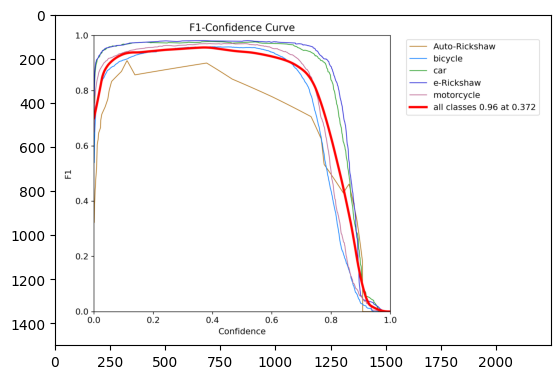

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt


# reading images
Image1 = cv2.imread('./val6/F1_curve.png')
Image2 = cv2.imread('./val6/PR_curve.png')
Image3 = cv2.imread('./val6/P_curve.png')
Image4 = cv2.imread('./val6/R_curve.png')
Image5 = cv2.imread('./val6/confusion_matrix_normalized.png')
# Adds a subplot at the 1st position
# showing image
plt.imshow(Image1)






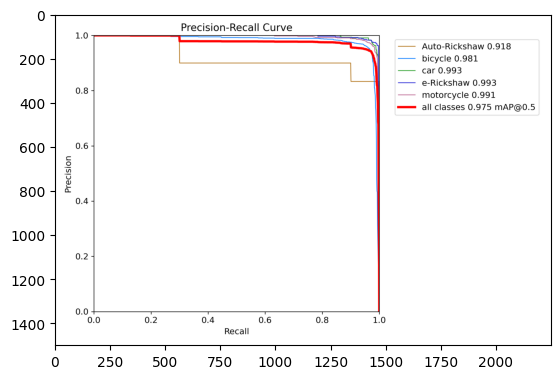

In [ ]:
plt.imshow(Image2)

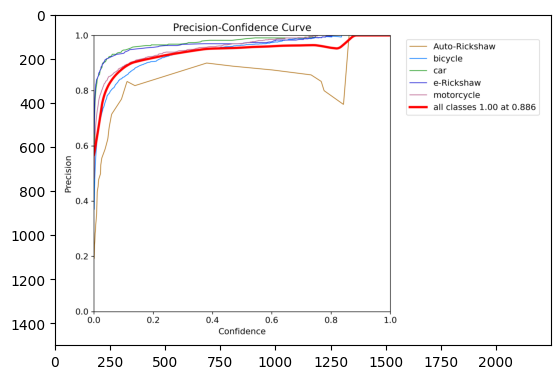

In [ ]:
plt.imshow(Image3)

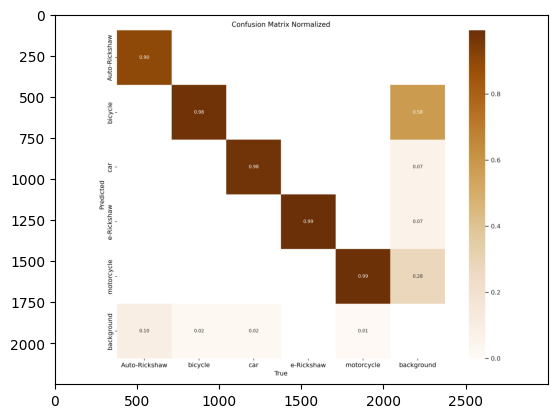

In [ ]:
plt.imshow(Image5)

# **Tracking and Monitoring**


0: 384x640 1 bicycle, 2 cars, 177.4ms
Speed: 2.1ms preprocess, 177.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


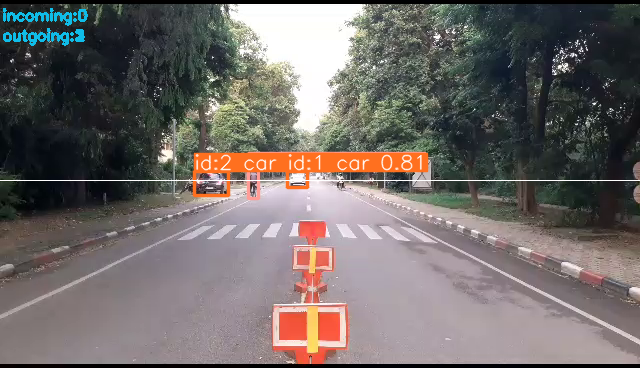


0: 384x640 1 bicycle, 2 cars, 166.1ms
Speed: 2.1ms preprocess, 166.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 142.7ms
Speed: 3.4ms preprocess, 142.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 125.9ms
Speed: 4.2ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 149.1ms
Speed: 3.7ms preprocess, 149.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 124.7ms
Speed: 4.4ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 127.1ms
Speed: 6.3ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 125.2ms
Speed: 5.0ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1

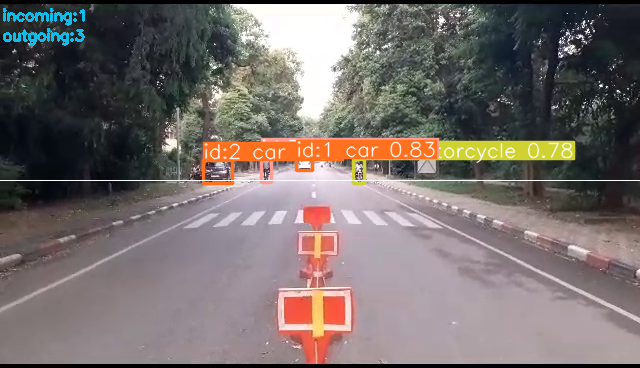


0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 156.0ms
Speed: 3.6ms preprocess, 156.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 124.4ms
Speed: 3.1ms preprocess, 124.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 136.6ms
Speed: 3.9ms preprocess, 136.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 125.4ms
Speed: 3.8ms preprocess, 125.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 133.4ms
Speed: 6.1ms preprocess, 133.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 129.1ms
Speed: 4.6ms preprocess, 129.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 132.0ms
Speed: 3.9ms preprocess, 132.0ms inferenc

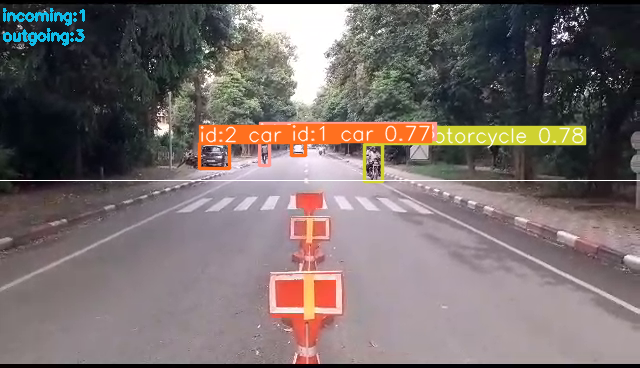


0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 172.2ms
Speed: 1.8ms preprocess, 172.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 131.7ms
Speed: 3.8ms preprocess, 131.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 182.6ms
Speed: 3.9ms preprocess, 182.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 218.6ms
Speed: 3.9ms preprocess, 218.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 190.2ms
Speed: 4.3ms preprocess, 190.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 196.0ms
Speed: 5.4ms preprocess, 196.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 195.4ms
Speed: 3.8ms preprocess, 195.4ms inferenc

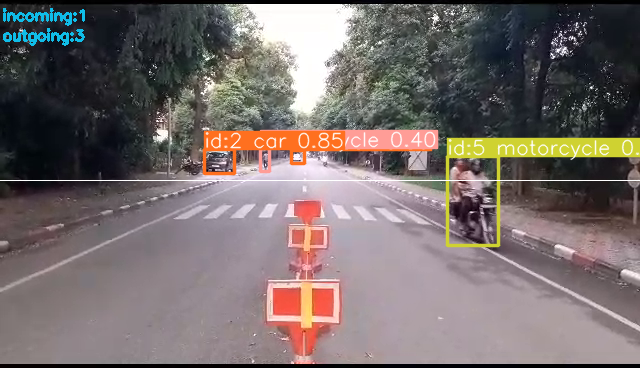


0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 158.6ms
Speed: 3.3ms preprocess, 158.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 1 car, 1 motorcycle, 139.8ms
Speed: 4.1ms preprocess, 139.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 1 car, 1 motorcycle, 144.1ms
Speed: 7.8ms preprocess, 144.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 142.3ms
Speed: 4.8ms preprocess, 142.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 1 car, 1 motorcycle, 155.9ms
Speed: 4.7ms preprocess, 155.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicycle, 2 cars, 1 motorcycle, 142.7ms
Speed: 4.2ms preprocess, 142.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 153.7ms
Speed: 4.3ms preprocess, 153.7ms inference, 0.8ms postpr

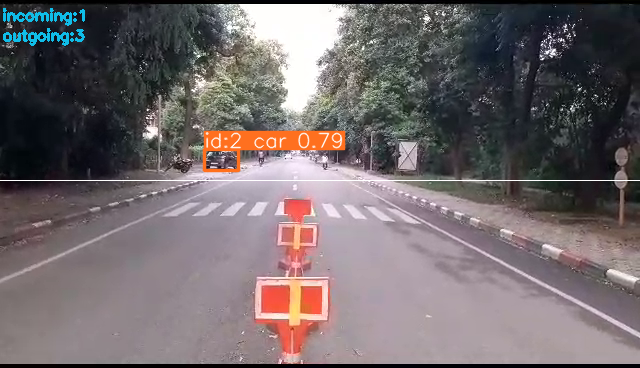


0: 384x640 1 car, 180.2ms
Speed: 2.3ms preprocess, 180.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 150.5ms
Speed: 4.2ms preprocess, 150.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 149.2ms
Speed: 4.0ms preprocess, 149.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 139.8ms
Speed: 3.8ms preprocess, 139.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 147.1ms
Speed: 3.8ms preprocess, 147.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 160.2ms
Speed: 4.1ms preprocess, 160.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 158.2ms
Speed: 4.5ms preprocess, 158.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 149.6ms
Speed: 4.9ms preprocess, 149.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


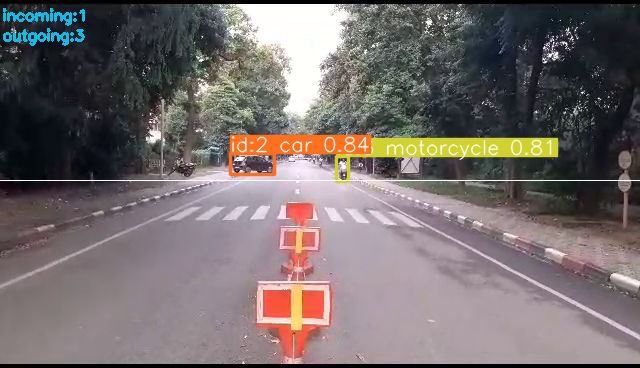


0: 384x640 1 car, 1 motorcycle, 176.8ms
Speed: 4.2ms preprocess, 176.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 193.7ms
Speed: 3.7ms preprocess, 193.7ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 216.7ms
Speed: 6.1ms preprocess, 216.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 234.9ms
Speed: 3.4ms preprocess, 234.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 204.7ms
Speed: 3.8ms preprocess, 204.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 219.4ms
Speed: 3.8ms preprocess, 219.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 212.5ms
Speed: 3.4ms preprocess, 212.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorc

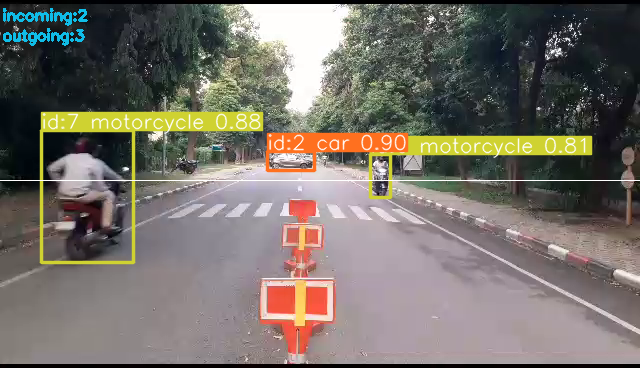


0: 384x640 1 car, 2 motorcycles, 173.1ms
Speed: 3.9ms preprocess, 173.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 161.1ms
Speed: 4.0ms preprocess, 161.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 172.5ms
Speed: 4.0ms preprocess, 172.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 159.2ms
Speed: 4.6ms preprocess, 159.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 165.6ms
Speed: 3.8ms preprocess, 165.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 160.0ms
Speed: 3.7ms preprocess, 160.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 165.8ms
Speed: 5.1ms preprocess, 165.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2

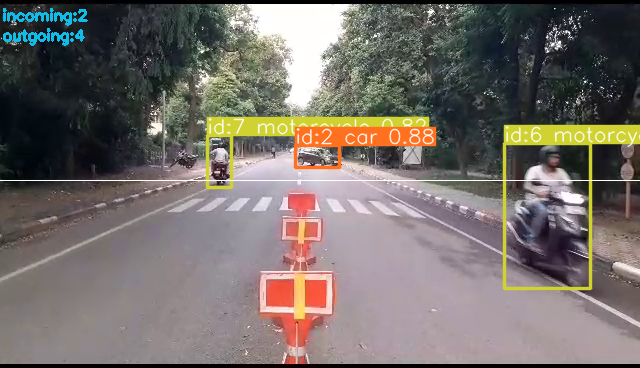


0: 384x640 1 car, 2 motorcycles, 178.1ms
Speed: 3.8ms preprocess, 178.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 223.2ms
Speed: 7.0ms preprocess, 223.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 199.8ms
Speed: 3.9ms preprocess, 199.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 205.7ms
Speed: 3.7ms preprocess, 205.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 195.0ms
Speed: 3.7ms preprocess, 195.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 207.3ms
Speed: 3.9ms preprocess, 207.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2 motorcycles, 234.7ms
Speed: 5.1ms preprocess, 234.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 2

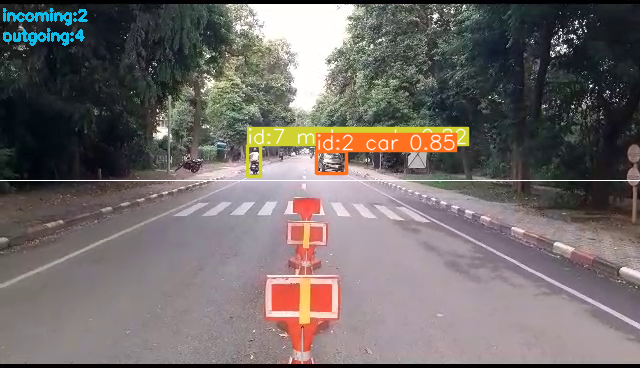


0: 384x640 1 car, 1 motorcycle, 185.3ms
Speed: 4.0ms preprocess, 185.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 183.5ms
Speed: 4.3ms preprocess, 183.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 172.2ms
Speed: 3.4ms preprocess, 172.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 186.3ms
Speed: 3.8ms preprocess, 186.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 219.0ms
Speed: 3.8ms preprocess, 219.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 233.5ms
Speed: 1.8ms preprocess, 233.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 236.4ms
Speed: 6.9ms preprocess, 236.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorc

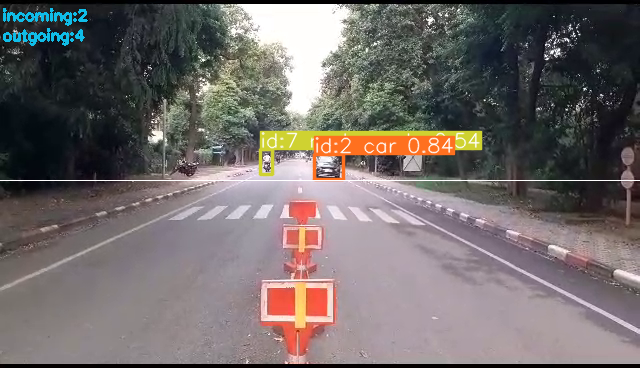


0: 384x640 1 car, 1 motorcycle, 187.0ms
Speed: 3.1ms preprocess, 187.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 183.1ms
Speed: 3.9ms preprocess, 183.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 188.6ms
Speed: 3.8ms preprocess, 188.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 194.6ms
Speed: 5.4ms preprocess, 194.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 185.5ms
Speed: 3.7ms preprocess, 185.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 185.2ms
Speed: 4.0ms preprocess, 185.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 motorcycle, 184.0ms
Speed: 3.8ms preprocess, 184.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 198.3ms


In [ ]:
from ultralytics.utils import VERBOSE
from collections import defaultdict

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/Temperory_things/runs/detect/train16/weights/best.pt')

# processsing the video file
video_path = "/content/WhatsApp Video 2023-08-19 at 18.59.09.mp4"
cap = cv2.VideoCapture(video_path)
fps = cap.get(5)


# Store the track history
track_history = defaultdict(lambda: [])

#defining some variable
in_start,in_end= (0,180),(650,180)
out_start,out_end= (0,180),(650,180)


track_list=[]
incoming=0
outgoing=0
offset=5
fourcc = cv2.VideoWriter_fourcc(*'XVID')
size=(640,384)
out = cv2.VideoWriter("/content/result.mp4", fourcc,30,size )
count=0
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()


    if success:
        height, width, layers = frame.shape
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Get the boxes and track IDs
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Plot the tracks
        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)

            #for incoming vehicle
            if(x>=int((in_end[0]-in_start[0])/2)):
              if track_id not in track_list:
                if (y>(in_end[1]-offset)):
                  if (y<(in_end[1]+offset)):
                    incoming=incoming+1
                    track_list.append(track_id)
            else:
                      #for outgoing vehicle
              if track_id not in track_list:
                if (y<(out_start[1]+offset)):
                  if (y>(out_start[1]-offset)):
                    outgoing=outgoing+1
                    track_list.append(track_id)




            # Draw the tracking lines
            #points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            #cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)
            cv2.line(annotated_frame,in_start,in_end,(255,255,255),1)
            cv2.line(annotated_frame,out_start,out_end,(255,255,255),1)

            cv2.putText(annotated_frame,f"incoming:{incoming}",(2,20),0,.5,(232, 189, 16),2)
            cv2.putText(annotated_frame,f"outgoing:{outgoing}",(2,40),0,.5,(232, 189, 16),2)



        # Display the annotated frame
        if (count%50==0):
          cv2_imshow(annotated_frame)
          count=count+1
        else:
          count=count+1

        out.write(annotated_frame)

        # Break the loop if 'q' is pressedq
        # if cv2.waitKey(1) & 0xFF == ord("q"):
        #     break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()